## Why do we want to use HSV rather than RGB for example for image segmentation?

The simplest answer for this question is that **you can separate colours much easier with HSV than with RGB**.

But, what does this even mean?

HSV gives us:
- Hue = Actual colour information, e.g., red, green, blue... On the other hand, RGB shows us colours as mixtures of Red, Green, Blue channels
- Saturation = How vivid or intense the colour is
- Values = Brightness of the pixel

For example, if you want to segment out all the blue objects in an image, it's much easier to do so in HSV space because all the blue pixels will have similar hue values.

Check out the figure below.
- x-axis: Hue[0, 180]
- y-axis: Saturation[0,255]
- Value is 255 in this graph

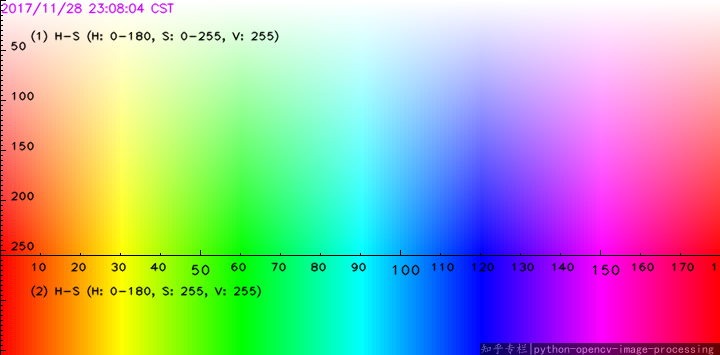

In [9]:
from IPython.display import Image
Image(filename='../data/hsv.png')

To clarify my point, I'll segment blueberries from mixed berry.

This process can be easily done without using U-Net or other kinds of CNN.

### 1. Image Segmentation of blueberries

In [7]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage import io, measure

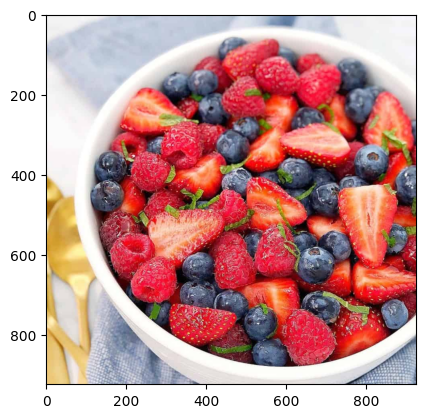

In [16]:
img = io.imread('mixed_berry.jpg')
plt.imshow(img)

In [18]:
img.shape

(924, 924, 3)

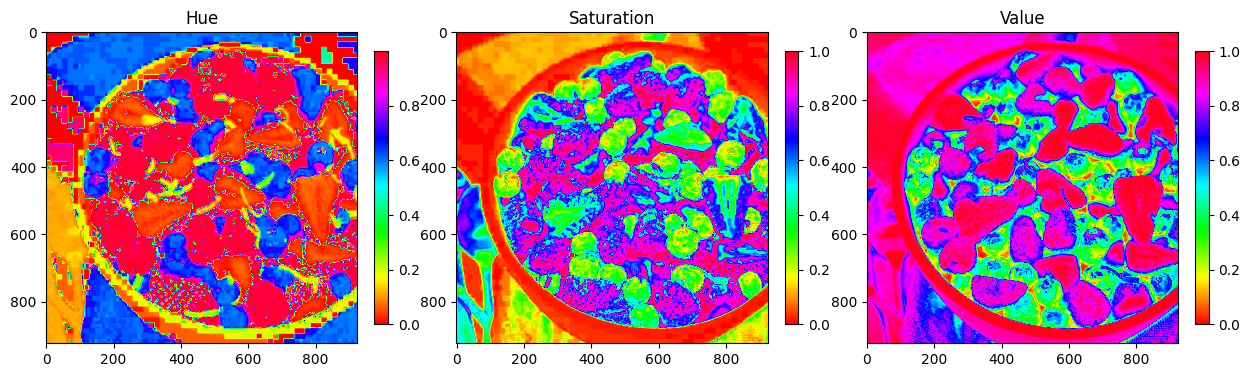

In [8]:
from skimage.color import rgb2hsv
# show hsv
mixed_berry = io.imread('mixed_berry.jpg')
mixed_berry_hsv = rgb2hsv(mixed_berry)
fig, ax = plt.subplots(1, 3, figsize=(15,12))
im = ax[0].imshow(mixed_berry_hsv[:,:,0], cmap='hsv')
ax[0].set_title('Hue')
fig.colorbar(im, ax=ax[0], fraction=0.04)

im = ax[1].imshow(mixed_berry_hsv[:,:,1], cmap='hsv')
ax[1].set_title('Saturation')
fig.colorbar(im, ax=ax[1], fraction=0.04)

im = ax[2].imshow(mixed_berry_hsv[:,:,2], cmap='hsv')
ax[2].set_title('Value')
fig.colorbar(im, ax=ax[2], fraction=0.04)